In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import tensorflow as tf

def preprocess_data(df):
    """
    Preprocess the network traffic data.
    """
    # Create a copy of the dataframe
    df = df.copy()
    
    # Drop non-feature columns
    columns_to_drop = [
        'Flow ID', 
        'Src IP', 
        'Dst IP', 
        'Timestamp',
        'Activity'  # Drop Activity column as in original code
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Print number of columns before processing
    print(f"Number of columns before processing: {len(df.columns)}")
    print("Columns:", df.columns.tolist())
    
    # Handle categorical variables
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column != 'Stage':  # Don't encode the target yet
            df[column] = le.fit_transform(df[column])
    
    # Separate features and target
    X = df.drop('Stage', axis=1)
    y = df['Stage']
    
    # Print number of features after separation
    print(f"Number of features after separation: {X.shape[1]}")
    
    # Convert target to numeric using the same mapping as original
    stage_mapping = {
        'BENIGN': 0,
        'Benign': 0,
        'Data Exfiltration': 1,
        'Establish Foothold': 1,
        'Lateral Movement': 1,
        'Reconnaissance': 1
    }
    y = y.map(stage_mapping)
    
    # Convert all features to numeric
    X = X.astype(float)
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Final feature shape: {X_scaled.shape}")
    return X_scaled, y, le

def load_saved_model(model_path):
    """
    Load the saved .keras model.
    """
    try:
        print(f"Loading model from: {model_path}")
        model = tf.keras.models.load_model(model_path)
        return model
    except Exception as e:
        print(f"Error loading model: {str(e)}")
        raise

def evaluate_model(model, X, y):
    """
    Evaluate the model and return various metrics.
    """
    # Make predictions
    y_pred = model.predict(X, verbose=0)  # Added verbose=0 to reduce output
    y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='binary')
    f1 = f1_score(y, y_pred_classes, average='binary')
    
    # Generate detailed classification report
    report = classification_report(y, y_pred_classes)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1,
        'detailed_report': report
    }

def main():
    try:
        # Load the CSV file
        print("Loading data...")
        df = pd.read_csv('E:\\PFE2025\\Dataset\\Dataset_1\\CSV\\enp0s3-public-wednesday.pcap_Flow.csv')
        
        # Preprocess the data
        print("Preprocessing data...")
        X, y, label_encoder = preprocess_data(df)
        
        # Verify input shape matches model expectations
        print(f"Input shape: {X.shape}")
        
        # Load the saved model
        print("\nLoading model...")
        model_path = 'E:\\PFE2025\\fedsec\\fedsec\\saved_models\\best_model.keras'
        model = load_saved_model(model_path)
        
        # Print model summary
        print("\nModel architecture:")
        model.summary()
        
        # Evaluate the model
        print("\nEvaluating model...")
        metrics = evaluate_model(model, X, y)
        
        # Print results
        print("\nEvaluation Results:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")
        print("\nDetailed Classification Report:")
        print(metrics['detailed_report'])
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    main()

Loading data...
Preprocessing data...
Number of columns before processing: 80
Columns: ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg

e:\PFE2025\venv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 79)             │           316 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,461 (243.99 KB)

 Trainable params: 20,767 (81.12 KB)

 Non-trainable params: 158 (632.00 B)

 Optimizer params: 41,536 (162.25 KB)


Evaluating model...

Evaluation Results:
Accuracy: 0.5064
Precision: 0.0000
F1 Score: 0.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      8856
           1       0.00      0.00      0.00      8632

    accuracy                           0.51     17488
   macro avg       0.25      0.50      0.34     17488
weighted avg       0.26      0.51      0.34     17488



e:\PFE2025\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PFE2025\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PFE2025\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\PFE2025\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: 

Selected Features:
Index(['Src Port', 'Dst Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Std', 'Down/Up Ratio',
       'Bwd Init Win Bytes'],
      dtype='object')

Feature Ranking:
                Feature  Rank
0              Src Port     1
68   Bwd Init Win Bytes     1
53        Down/Up Ratio     1
43    Packet Length Std     1
38        Fwd Packets/s     1
..                  ...   ...
59    Fwd Bulk Rate Avg    56
60   Bwd Bytes/Bulk Avg    57
35        Bwd URG Flags    58
58  Fwd Packet/Bulk Avg    59
57   Fwd Bytes/Bulk Avg    60

[79 rows x 2 columns]

Accuracy with selected features: 99.01%
Cross-validated Accuracy: 99.14% ± 0.04%


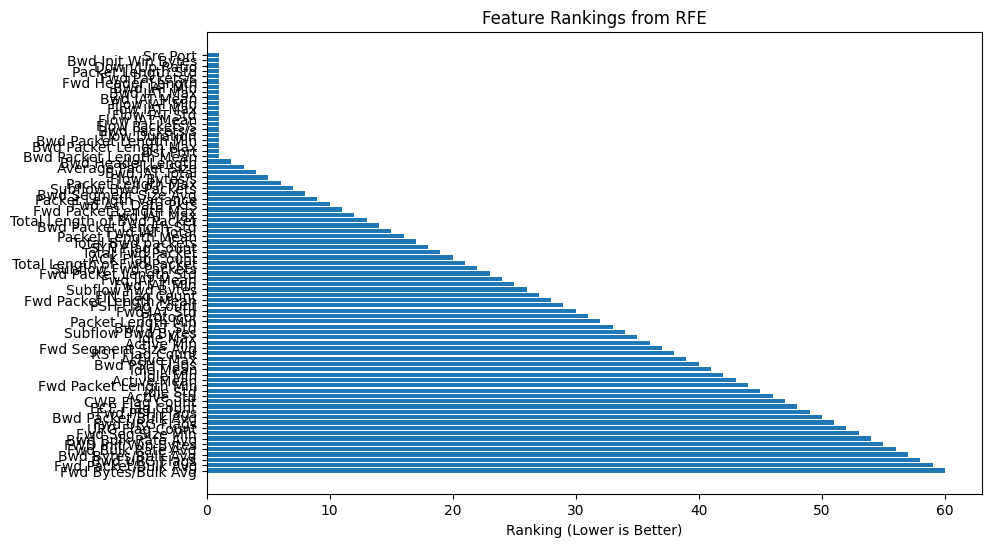

In [8]:
from glob import glob
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Prepare your data
# --------------------------
stage_mapping = {
    'BENIGN': 0,        # Benign
    'Benign': 0,        # Benign
    'Data Exfiltration': 1,        # Malicious
    'Establish Foothold': 1,       # Malicious
    'Lateral Movement': 1,         # Malicious
    'Reconnaissance': 1            # Malicious
}

data_directory = "C:\\Users\\brahim\\Desktop\\PFE2025\\Dataset\\csv\\"
file_pattern = os.path.join(data_directory, "*.csv")
data_files = glob(file_pattern)
dfs = []
for file in data_files:
    df = pd.read_csv(file)
        # Map the 'Stage' column using the provided mapping
    df['Stage'] = df['Stage'].map(stage_mapping)
        # Drop the 'Activity' column if it exists
    df.drop(columns=['Activity'], errors='ignore', inplace=True)        
    dfs.append(df)
    # Concatenate all DataFrames into one
df_all = pd.concat(dfs, ignore_index=True)
# Assume 'df' is your DataFrame containing all features and a target 'label'
# Drop columns that are identifiers or non-predictive (e.g., Flow ID, IP addresses, Timestamps)
columns_to_drop = ["Flow ID", "Src IP", "Dst IP", "Timestamp"]
X = df_all.drop(columns=columns_to_drop + ['Stage'], axis=1)
y = df_all['Stage']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------
# Step 2: Apply RFE with RandomForestClassifier
# ----------------------------------------

# Initialize a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Define the number of features you wish to select.
# For example, here we choose to select the top 20 features.
n_features_to_select = 20

# Setup RFE with our classifier
rfe_selector = RFE(estimator=rf_clf, n_features_to_select=n_features_to_select, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train)

# Get the mask of selected features and their names
selected_features_mask = rfe_selector.support_
selected_features = X_train.columns[selected_features_mask]
print("Selected Features:")
print(selected_features)

# Optional: view ranking of features (1 = selected as top, higher numbers = lower ranking)
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': rfe_selector.ranking_
}).sort_values(by='Rank')
print("\nFeature Ranking:")
print(feature_ranking)

# ----------------------------------------
# Step 3: Evaluate Model Performance with Selected Features
# ----------------------------------------

# Train Random Forest using only the selected features
rf_clf.fit(X_train[selected_features], y_train)
y_pred = rf_clf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy with selected features: {:.2f}%".format(accuracy * 100))

# ----------------------------------------
# (Optional) Step 4: Cross-validation for Robustness
# ----------------------------------------
cv_scores = cross_val_score(rf_clf, X_train[selected_features], y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy: {:.2f}% ± {:.2f}%".format(cv_scores.mean() * 100, cv_scores.std() * 100))

# ----------------------------------------
# (Optional) Plot feature rankings for visualization
# ----------------------------------------
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Rank'])
plt.xlabel("Ranking (Lower is Better)")
plt.title("Feature Rankings from RFE")
plt.gca().invert_yaxis()  # Best features at the top
plt.show()


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import tensorflow as tf

def preprocess_data(df):
    """
    Preprocess the network traffic data.
    """
    # Create a copy of the dataframe
    df = df.copy()
    
    # Drop non-feature columns
    columns_to_drop = [
        'Flow ID', 
        'Src IP', 
        'Dst IP', 
        'Timestamp',
        'Activity'  # Drop Activity column as in original code
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Print number of columns before processing
    print(f"Number of columns before processing: {len(df.columns)}")
    print("Columns:", df.columns.tolist())
    
    # Handle categorical variables
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column != 'Stage':  # Don't encode the target yet
            df[column] = le.fit_transform(df[column])
    
    # Separate features and target
    X = df.drop('Stage', axis=1)
    y = df['Stage']
    
    # Print number of features after separation
    print(f"Number of features after separation: {X.shape[1]}")
    
    # Convert target to numeric using the same mapping as original
    stage_mapping = {
        'BENIGN': 0,
        'Benign': 0,
        'Data Exfiltration': 1,
        'Establish Foothold': 1,
        'Lateral Movement': 1,
        'Reconnaissance': 1
    }
    y = y.map(stage_mapping)
    
    # Convert all features to numeric
    X = X.astype(float)
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Final feature shape: {X_scaled.shape}")
    return X_scaled, y, le

def load_model_weights(weights_path):
    """
    Load the saved weights using the original model architecture.
    """
    # Create model with the exact same architecture as in task.py
    input_shape = (79,)  # Original input shape
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Use the same optimizer configuration as original
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    )
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Load weights
    weights = np.load(weights_path, allow_pickle=True)
    model.set_weights([weights[key] for key in weights.files])
    
    return model

def evaluate_model(model, X, y):
    """
    Evaluate the model and return various metrics.
    """
    # Make predictions
    y_pred = model.predict(X)
    y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='binary')
    f1 = f1_score(y, y_pred_classes, average='binary')
    print ("*********************************************")
    print ("accuracy ===========",accuracy)
    print ("precision ===========",precision)
    print ("f1 ===========",f1)
    # Generate detailed classification report
    report = classification_report(y, y_pred_classes)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1,
        'detailed_report': report
    }

def main():
    # Load the CSV file
    print("Loading data...")
    df = pd.read_csv('C:\\Users\\Hamza\\Desktop\\pfe\\csv\\Defender_Dataset\\enp0s3-pvt-thursday.pcap_Flow_part1.csv')
    
    # Preprocess the data
    print("Preprocessing data...")
    X, y, label_encoder = preprocess_data(df)
    
    # Verify input shape matches model expectations
    if X.shape[1] != 79:
        raise ValueError(f"Expected 79 features but got {X.shape[1]}. Please check feature preprocessing.")
    
    # Load the model and weights
    print("Loading model...")
    model = load_model_weights('C:\\Users\\Hamza\\Desktop\\pfe\\pfe\\saved_models\\round-3-weights.npz')
    
    # Print model summary
    print("\nModel architecture:")
    model.summary()
    
    # Evaluate the model
    print("\nEvaluating model...")
    metrics = evaluate_model(model, X, y)
    
    # Print results
    print("\nEvaluation Results:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print("\nDetailed Classification Report:")
    print(metrics['detailed_report'])

if __name__ == "__main__":
    main()

Loading data...
Preprocessing data...
Number of columns before processing: 80
Columns: ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag 

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_40          │ (None, 79)             │           316 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 128)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,925 (81.74 KB)

 Trainable params: 20,767 (81.12 KB)

 Non-trainable params: 158 (632.00 B)


Evaluating model...
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
*********************************************
accuracy =========== 0.4375303840544482
precision =========== 0.0
f1 =========== 0.0

Evaluation Results:
Accuracy: 0.4375
Precision: 0.0000
F1 Score: 0.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       900
           1       0.00      0.00      0.00      1157

    accuracy                           0.44      2057
   macro avg       0.22      0.50      0.30      2057
weighted avg       0.19      0.44      0.27      2057



c:\Users\Hamza\Desktop\pfe\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hamza\Desktop\pfe\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hamza\Desktop\pfe\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hamza\Desktop\p